## 파이썬 패키지를 이용하여 수집하기

금융 데이터를 수집하기 위해 가장 많이 사용되는 패키지는 
> pandas-datareader 

금융 데이터를 제공하는 여러 가지 사이트의 정보를 쉽게 수집할 수 있도록 도와준다. 

국내 주식 데이터를 수집할 수 있는 패키지도 존재함.
> finance-datareader

### pandas-datareader

**주가 데이터**

In [1]:
TINGO_API_KEY = ''

In [3]:
import pandas_datareader as pdr 


df = pdr.get_data_tiingo('GOOG', api_key = TINGO_API_KEY)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close     high       low     open  \
symbol date                                                             
GOOG   2018-02-01 00:00:00+00:00  1167.70  1174.00  1157.520  1162.61   
       2018-02-02 00:00:00+00:00  1111.90  1123.07  1107.278  1122.00   
       2018-02-05 00:00:00+00:00  1055.80  1110.00  1052.030  1090.60   
       2018-02-06 00:00:00+00:00  1080.60  1081.71  1023.137  1027.18   
       2018-02-07 00:00:00+00:00  1048.58  1081.78  1048.260  1081.54   

                                   volume  adjClose  adjHigh    adjLow  \
symbol date                                                              
GOOG   2018-02-01 00:00:00+00:00  1974700    58.385  58.7000  57.87600   
       2018-02-02 00:00:00+00:00  4758496    55.595  56.1535  55.36390   
       2018-02-05 00:00:00+00:00  3336352    52.790  55.5000  52.60150   
       2018-02-06 00:00:00+00:00  3360727    54.030  54.0855  51.15685   
       2018-02-07 00:00:00+00:00  2331374    52.429  54.0890  52.41300   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOG   2018-02-01 00:00:00+00:00  58.1305   39494000      0.0          1.0  
       2018-02-02 00:00:00+00:00  56.1000   95169920      0.0          1.0  
       2018-02-05 00:00:00+00:00  54.5300   66727040      0.0          1.0  
       2018-02-06 00:00:00+00:00  51.3590   67214540      0.0          1.0  
       2018-02-07 00:00:00+00:00  54.0770   46627480      0.0          1.0

<AxesSubplot:xlabel='date', ylabel='adjClose'>

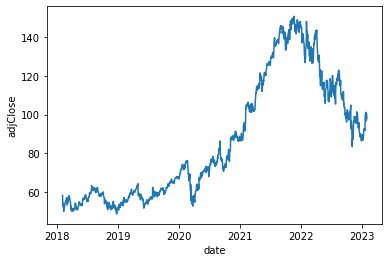

In [7]:
import seaborn as sns 
sns.lineplot(x = df.index.levels[1], # 날짜
             y = 'adjClose', # 종가
             data = df)

**주가 지수 데이터**

코스피, 나스닥과 같은 주가 지수 정보는 Stooq라는 곳에서 수집할 수 있다. 

KOSPI지수 코드 확인하고 지수 변화 그래프로 그리기

In [8]:
import pandas_datareader.data as web 

df = web.DataReader('^KOSPI', 'stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-30,2484.64,2491.13,2446.59,2450.47,460299000
2023-01-27,2474.52,2497.40,2464.53,2484.02,509288000
2023-01-26,2436.18,2468.65,2426.40,2468.65,486832000
2023-01-25,2426.58,2432.71,2421.51,2428.57,550087000
2023-01-20,2380.00,2395.97,2372.57,2395.26,302506000


<AxesSubplot:xlabel='Date', ylabel='Close'>

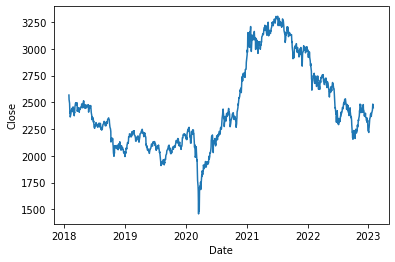

In [9]:
sns.lineplot(x = df.index, y = 'Close', data = df)

**환율 데이터**

환율 데이터는 Alpha Vantage라는 곳에서 무료로 API KEY를 발급받아 수집할 수 있다.

In [10]:
ALPHAVANTAGE_API_KEY = ' '

In [12]:
import pandas_datareader.data as web

# 원달러 환율
df_1 = web.DataReader('USD/KRW', 'av-forex', api_key = ALPHAVANTAGE_API_KEY)
df_1.head()

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1231.70000000


pandas-datareader 패키지는 실시간 환율 데이터만 수집할 수 있기 때문에 기간별 환율 데이터를 수집하고 싶으면 발급받은 API KEY를 통해서 직접 수집해야 한다.

API로 데이터를 수집하기 위해 urllib 패키지를 이용한다. 

In [16]:
from urllib.request import urlopen 
import json 
import pandas as pd 

url = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=KRW&outputsize=compact&apikey=' + ALPHAVANTAGE_API_KEY
result = urlopen(url)
result_read = result.read()

df = pd.DataFrame(json.loads(result_read)['Time Series FX (Daily)']).T
df.head()


,1. open,2. high,3. low,4. close
2023-01-31,1232.58000,1233.28000,1227.40000,1231.70000
2023-01-30,1229.60000,1231.79000,1226.01000,1231.44000
2023-01-27,1231.82000,1235.84000,1226.78000,1231.10000
2023-01-26,1232.66000,1235.08000,1229.06000,1231.83000
2023-01-25,1232.55000,1237.24000,1230.11000,1232.81000


요청한 데이터는 json 형식으로 회신되어, json 패키지를 활용하여 딕셔너리 자료형으로 바꿔준다. 

**원자재 가격 데이터**

원자재 가격은 미국 연방준비은행에서 관리하는 FRED(Federal Reserve Economic Data)에서 수집할 수 있다. 

찾고 싶은 정보를 사이트(https://fred.stlouisfed.org/)에서 검색한다.


원유 가격을 검색한 예) 

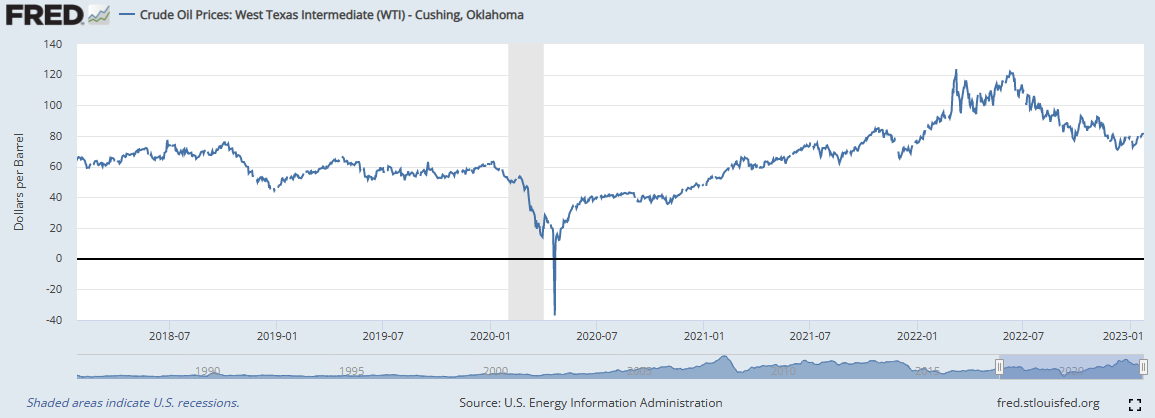

In [19]:
import pandas_datareader.data as web 
import datetime 

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 12, 31)

oil = web.DataReader('DCOILWTICO', 'fred', start, end)
oil.head()

,DCOILWTICO
DATE,
2015-01-01,NaN
2015-01-02,52.72
2015-01-05,50.05
2015-01-06,47.98
2015-01-07,48.69


**그 외 경제 지표 데이터**

|수집처|내용|
|:------:|:---:|
|Econdb|90개 이상의 공식적인 통계 기관으로 경제 데이터를 제공|
|Fred|세인트루이스 연방준비은행에서 제공하는 미국 및 각국의 주요 경제 지표 수집 가능|
|World Bank|세계 은행에서 제공하는 경제 지표 데이터|
|OECD|OECD 국가 통계 자료|
|Enigma|Enigma 사이트에서 제공하는 공개 데이터 수집 가능|


In [21]:
# World Back를 이용한 데이터 수집
from pandas_datareader import wb
wb.search('gdp.*capita.*const') # 마침표로 검색하려는 상세 내용 입력

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10654,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10656,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10658,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10659,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


<AxesSubplot:xlabel='year', ylabel='NY.GDP.PCAP.PP.KD'>

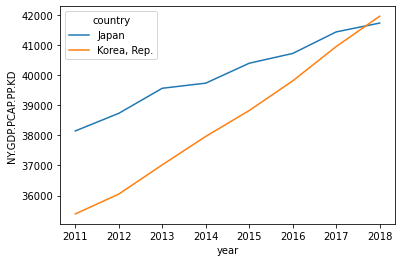

In [32]:
# 한국과 일본의 구매력 기준 1인당 국민 소득 
code = 'NY.GDP.PCAP.PP.KD'
matches = wb.search('gdp.*capita.*const')

data = wb.download(indicator = code, country = ['JPN', 'KOR'],
                   start = 2011, end = 2018)
data = data.reset_index(drop = False)
sns.lineplot(x = 'year', y = code, hue = 'country',
             data = data.ssort_values(by = ['country', 'year']))